# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


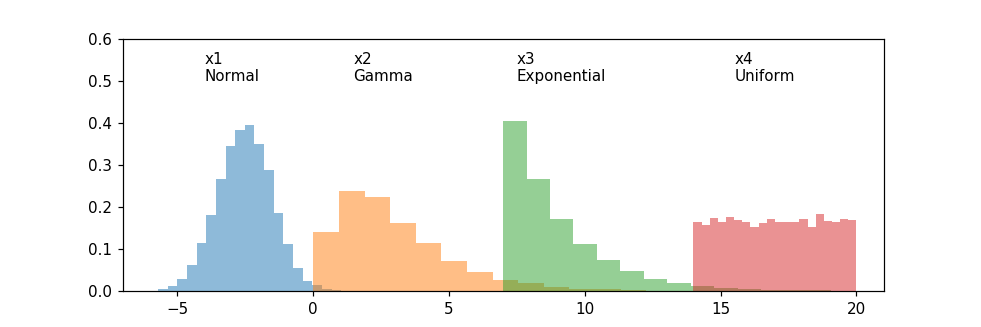

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


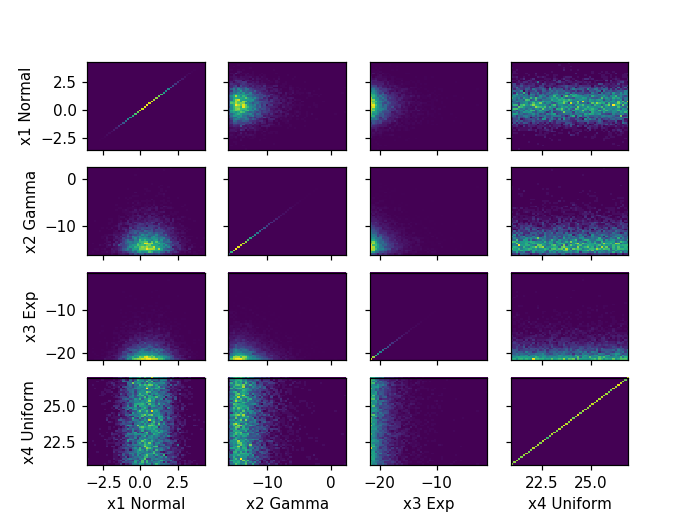

In [97]:
fig, axes = plt.subplots(4, 4, sharex='col', sharey='row')
X = [x1, x2, x3, x4]
n = len(X)
for i in range(n):
    for j in range(n):
        axes[i][j].hist2d(X[j], X[i], normed=True, bins=50)
axes[n-1][0].set_xlabel('x1 Normal')
axes[n-1][1].set_xlabel('x2 Gamma')
axes[n-1][2].set_xlabel('x3 Exp')
axes[n-1][3].set_xlabel('x4 Uniform')
axes[0][0].set_ylabel('x1 Normal')
axes[1][0].set_ylabel('x2 Gamma')
axes[2][0].set_ylabel('x3 Exp')
axes[3][0].set_ylabel('x4 Uniform')

In [89]:
import matplotlib.animation as animation
n = 100
r1 = np.random.normal(0, 1, n)
r2 = np.random.normal(0, 1, n)
r3 = np.random.normal(0, 1, n)
r4 = np.random.normal(0, 1, n)

def update(curr):
    print('n =', n)
    if curr == n:
        a.event_source.stop()
    global x1, x2, x3, x4
    x1 += r1[curr]
    x2 += r2[curr]
    x3 += r3[curr]
    x4 += r4[curr]
    plt.cla()
    plt.hist(x1, normed=True, bins=20, alpha=0.5)
    plt.hist(x2, normed=True, bins=20, alpha=0.5)
    plt.hist(x3, normed=True, bins=20, alpha=0.5)
    plt.hist(x4, normed=True, bins=20, alpha=0.5)
    plt.axis([-15,30,0,0.6])


<IPython.core.display.Javascript object>


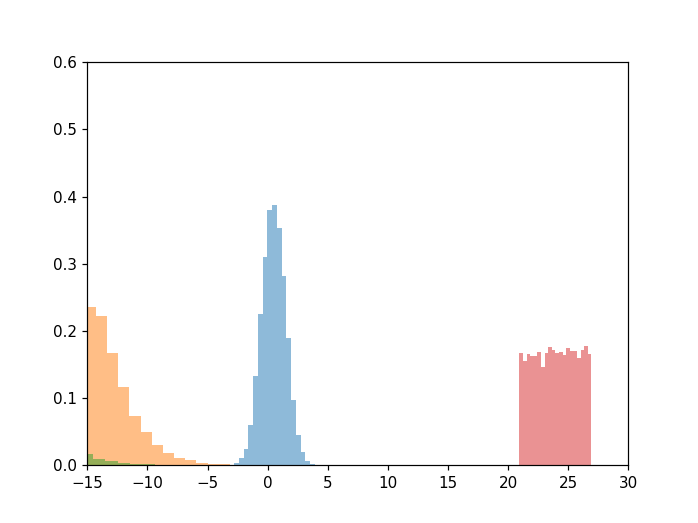

In [90]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)